# Sentiment140 Dataset - Data Cleaning & Preprocessing
## Assignment: Text Data Analysis and Preprocessing

**Dataset:** Sentiment140 (1.6M tweets)  
**Source:** Kaggle - https://www.kaggle.com/datasets/kazanova/sentiment140

**Tasks:**
1. Data Cleaning & Preprocessing
2. Data Statistics Report
3. Data Splits (Train/Validation/Test)

---

## 1. Import Required Libraries

- **sklearn**: For splitting data into train/validation/test sets

**What we're doing:** Loading all the Python libraries we need for text processing, data analysis, and visualization.- **matplotlib & seaborn**: For creating visualizations

- **nltk**: Natural Language Processing tools (tokenization, stopwords, lemmatization)

**Libraries:**- **re & string**: For text pattern matching and cleaning
- **pandas & numpy**: For data manipulation

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Text processing
import re
import string
from collections import Counter

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Download NLTK Resources

- **averaged_perceptron_tagger**: For identifying parts of speech

**What we're doing:** Downloading necessary language data files from NLTK library.- **omw-1.4**: Multilingual wordnet data

- **wordnet**: Dictionary for lemmatization (converting words to base form)

**Resources:**- **stopwords**: List of common words (like "the", "is", "and") to remove
- **punkt**: Tokenizer that splits text into words

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/Thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Thomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Thomas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Thomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 3. Load the Dataset

**Note:** Make sure you have downloaded the `training.1600000.processed.noemoticon.csv` from Kaggle and renamed/copied it to `Sentiment140.csv` in this directory.

**Dataset Columns:**
- `target`: Sentiment polarity (0 = negative, 2 = neutral, 4 = positive)
- `ids`: Tweet ID
- `date`: Date of the tweet
- `flag`: Query used (NO_QUERY if none)
- `user`: Username who tweeted
- `text`: Tweet content

In [3]:
# Load the dataset
# Note: The original CSV has no header, so we define column names
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load data
df = pd.read_csv('Sentiment140.csv', 
                 encoding='latin-1',  # Handle encoding issues
                 names=column_names,
                 header=None)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (1600000, 6)

First few rows:


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."


## 4. Initial Data Exploration

**Purpose:** Understanding the data before we start cleaning helps us know what issues to fix.

**What we're doing:** Getting a first look at our dataset to understand its structure and content.

- Sentiment distribution (how many positive vs negative tweets)

**We check:**- Missing values (empty cells)

- Dataset size (how many rows and columns)- Data types of each column

In [4]:
# Basic information about the dataset
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*50)
print("DATA TYPES")
print("="*50)
print(df.dtypes)

print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
print(df.isnull().sum())

print("\n" + "="*50)
print("SENTIMENT DISTRIBUTION")
print("="*50)
print(df['target'].value_counts().sort_index())

DATASET INFORMATION

Dataset Shape: (1600000, 6)
Number of rows: 1,600,000
Number of columns: 6

DATA TYPES
target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

MISSING VALUES
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

SENTIMENT DISTRIBUTION
target
0    800000
4    800000
Name: count, dtype: int64


## 5. Data Cleaning & Preprocessing

### 5.1 Check for Duplicates

**What we're checking:** Looking for duplicate rows in the dataset.

**Two approaches to consider:**

1. **Check entire row** (all columns must match):
   - Only removes rows where ALL columns are identical
   - More conservative approach
   - Example: Same tweet by different users = NOT duplicate

2. **Check text column only** (our approach):
   - Removes rows where tweet TEXT is identical
   - More aggressive duplicate removal
   - Example: Same tweet by different users = IS duplicate

**Why we check text only:**
- For sentiment analysis, we care about unique TEXT, not unique metadata
- Same text should have same sentiment regardless of who/when it was posted
- Prevents model from learning the same text multiple times
- More effective at reducing data redundancy

**What we're removing:** 
- Tweets with identical text content (keeping first occurrence)
- Example: If "I love this!" appears 3 times, we keep 1 and remove 2 copies

**Important Note:** 
- ❌ We do **NOT** modify the original `Sentiment140.csv` file
- ✅ We only remove duplicates from our working data in memory (stored in `df_cleaned`)

**Result:** Cleaner dataset without repeated text for better model training.

In [5]:
# First, let's check both types of duplicates to understand the difference
print("="*80)
print("DUPLICATE ANALYSIS")
print("="*80)

# 1. Check for complete row duplicates (all columns identical)
complete_row_duplicates = df.duplicated(keep=False).sum()
print(f"\n1. Complete row duplicates (all columns match): {complete_row_duplicates:,}")
print("   These are rows where EVERY column is identical")

# 2. Check for text-only duplicates (same tweet text)
text_duplicates = df.duplicated(subset=['text'], keep=False).sum()
print(f"\n2. Text-only duplicates (same tweet content): {text_duplicates:,}")
print("   These are rows where the TEXT is the same (may have different IDs, dates, users)")

# Show the difference
print(f"\n3. Difference: {text_duplicates - complete_row_duplicates:,}")
print("   These are duplicate texts posted by different users or at different times")

# Let's see an example of text duplicates
print("\n" + "="*80)
print("EXAMPLE: Same text, different metadata")
print("="*80)
sample_text = df[df.duplicated(subset=['text'], keep=False)]['text'].iloc[0]
duplicate_examples = df[df['text'] == sample_text].head(3)
print(duplicate_examples[['target', 'user', 'date', 'text']])

# Decision: Remove text duplicates (more aggressive, better for sentiment analysis)
print("\n" + "="*80)
print("REMOVING TEXT DUPLICATES")
print("="*80)
print("Approach: Removing rows with duplicate TEXT (keeping first occurrence)")
print("Reason: For sentiment analysis, we want unique text content\n")

df_cleaned = df.drop_duplicates(subset=['text'], keep='first')
print(f"Original rows: {df.shape[0]:,}")
print(f"After removing text duplicates: {df_cleaned.shape[0]:,}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]:,}")

# Note: If you want to use complete row duplicates instead, use this:
# df_cleaned = df.drop_duplicates(keep='first')  # removes only complete row duplicates

DUPLICATE ANALYSIS

1. Complete row duplicates (all columns match): 0
   These are rows where EVERY column is identical

2. Text-only duplicates (same tweet content): 26,968
   These are rows where the TEXT is the same (may have different IDs, dates, users)

3. Difference: 26,968
   These are duplicate texts posted by different users or at different times

EXAMPLE: Same text, different metadata
       target        user                          date           text
54          0  CiaraRenee  Mon Apr 06 22:22:32 PDT 2009  I need a hug 
35285       0       1Song  Mon Apr 20 06:03:00 PDT 2009  I need a hug 
84168       0      liedra  Sun May 10 02:05:57 PDT 2009  I need a hug 

REMOVING TEXT DUPLICATES
Approach: Removing rows with duplicate TEXT (keeping first occurrence)
Reason: For sentiment analysis, we want unique text content

Original rows: 1,600,000
After removing text duplicates: 1,581,466
Rows removed: 18,534


### 5.2 Handle Missing Values

**Note:** Changes are only made to `df_cleaned` in memory, not the original CSV file.

**What we're checking:** Looking for empty or null values in the dataset, especially in the 'text' column.

**Why?** We can't analyze sentiment if there's no text to analyze!

**What we're removing:** 

- Rows where the tweet text is empty or missing- Example: If a row has sentiment=0 but text="" (empty), we remove that row

In [6]:
# Check for missing values in text column
print("Missing values per column:")
print(df_cleaned.isnull().sum())

# Remove rows with missing text
df_cleaned = df_cleaned.dropna(subset=['text'])
print(f"\nRows after removing missing text: {df_cleaned.shape[0]:,}")

Missing values per column:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

Rows after removing missing text: 1,581,466


### 5.3 Define Text Cleaning Functions

**What we're doing:** Creating helper functions to clean the tweet text.

**Cleaning steps:**
1. **remove_urls**: Delete web links (http://... or www...)
2. **remove_html_tags**: Remove HTML code (`<br>`, `<div>`, etc.)
3. **remove_mentions**: Delete @username references
4. **remove_hashtag_symbol**: Remove # but keep the word (#happy → happy)
5. **remove_emojis**: Delete emoji characters (😀, 👍, etc.)
6. **remove_special_characters**: Delete special symbols, keep letters/numbers
7. **remove_extra_spaces**: Clean up multiple spaces
8. **clean_text**: Master function that applies all cleaning steps + converts to lowercase

**Example:**
- Before: "@John Check this out! http://example.com 😀 #awesome"
- After: "check this out awesome"

In [9]:
def remove_urls(text):
    """Remove URLs from text"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

def remove_html_tags(text):
    """Remove HTML tags from text"""
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub('', text)

def remove_mentions(text):
    """Remove @mentions from text"""
    return re.sub(r'@\w+', '', text)

def remove_hashtag_symbol(text):
    """Remove # symbol but keep the hashtag text"""
    return re.sub(r'#', '', text)

def remove_emojis(text):
    """Remove emojis from text"""
    emoji_pattern = re.compile(
        "["
        + u"\U0001F600-\U0001F64F"  # emoticons
        + u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        + u"\U0001F680-\U0001F6FF"  # transport & map symbols
        + u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        + u"\U00002702-\U000027B0"
        + u"\U000024C2-\U0001F251"
        + "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def remove_special_characters(text):
    """Remove special characters but keep basic punctuation"""
    # Keep letters, numbers, and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    return text

def remove_extra_spaces(text):
    """Remove extra whitespace"""
    return ' '.join(text.split())

def clean_text(text):
    """Apply all cleaning functions"""
    text = str(text)  # Ensure text is string
    text = remove_urls(text)
    text = remove_html_tags(text)
    text = remove_mentions(text)
    text = remove_hashtag_symbol(text)
    text = remove_emojis(text)
    text = remove_special_characters(text)
    text = remove_extra_spaces(text)
    text = text.lower()  # Lowercase
    return text.strip()

print("Text cleaning functions defined!")

Text cleaning functions defined!


### 5.4 Apply Text Cleaning

**What we're doing:** Running all the cleaning functions on every tweet in the dataset.

**Result:** A new column `text_cleaned` with processed tweet text.

**Process:**
1. Show 3 example tweets BEFORE cleaning
2. Apply `clean_text()` function to all tweets
3. Show the same 3 tweets AFTER cleaning
4. Check for tweets that became empty after cleaning
5. Count and display all empty tweets (showing the complete row)

**Note:** We keep both original and cleaned text so we can compare them. Empty tweets will be identified but NOT removed yet - you can review them first before deciding.

In [10]:
# Show example before cleaning
print("Example tweets BEFORE cleaning:")
print("="*80)
for i in range(3):
    print(f"{i+1}. {df_cleaned.iloc[i]['text']}")
    print()

# Apply cleaning
print("\nApplying text cleaning...")
df_cleaned['text_cleaned'] = df_cleaned['text'].apply(clean_text)

# Show example after cleaning
print("\n" + "="*80)
print("Example tweets AFTER cleaning:")
print("="*80)
for i in range(3):
    print(f"{i+1}. Original: {df_cleaned.iloc[i]['text']}")
    print(f"   Cleaned:  {df_cleaned.iloc[i]['text_cleaned']}")
    print()

# Check for empty tweets after cleaning
print("\n" + "="*80)
print("CHECKING FOR EMPTY TWEETS AFTER CLEANING")
print("="*80)

empty_tweets = df_cleaned[df_cleaned['text_cleaned'].str.strip() == '']
print(f"\nNumber of tweets that became empty after cleaning: {len(empty_tweets)}")

if len(empty_tweets) > 0:
    print(f"\nShowing first 3 examples of empty tweets:\n")
    print(empty_tweets.head(3))
    
    # Save empty tweets to CSV
    print("\n" + "="*80)
    print("SAVING EMPTY TWEETS")
    print("="*80)
    empty_tweets.to_csv('empty_text_cleaned.csv', index=False)
    print(f"✅ Saved {len(empty_tweets)} empty tweets to 'empty_text_cleaned.csv'")
    
    # Remove empty tweets from dataset
    print("\n" + "="*80)
    print("REMOVING EMPTY TWEETS")
    print("="*80)
    print(f"Dataset size before removal: {df_cleaned.shape[0]:,} rows")
    df_cleaned = df_cleaned[df_cleaned['text_cleaned'].str.strip() != '']
    print(f"Dataset size after removal: {df_cleaned.shape[0]:,} rows")
    print(f"Rows removed: {len(empty_tweets):,}")
else:
    print("\nNo tweets became empty after cleaning. All tweets have content!")
    print("No empty tweets file created.")

print(f"\n✅ Final dataset size: {df_cleaned.shape[0]:,} rows")

Example tweets BEFORE cleaning:
1. @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

2. is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!

3. @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds


Applying text cleaning...

Example tweets AFTER cleaning:
1. Original: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
   Cleaned:  awww, thats a bummer. you shoulda got david carr of third day to do it. d

2. Original: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
   Cleaned:  is upset that he cant update his facebook by texting it... and might cry as a result school today also. blah!

3. Original: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
   Cleaned

### 5.5 Tokenization

**Result:** A new column `tokens` containing a list of words for each tweet.

**What we're doing:** Splitting the cleaned text into individual words (tokens).

- TweetTokenizer is specifically designed for social media text

**Example:**- Regular tokenizers don't handle tweets well (emojis, abbreviations, slang)

- Text: "i love machine learning"**Why TweetTokenizer?** 

- Tokens: ['i', 'love', 'machine', 'learning']

In [11]:
# Initialize tokenizer (TweetTokenizer is better for tweets)
tweet_tokenizer = TweetTokenizer()

# Tokenize the cleaned text
print("Tokenizing tweets...")
df_cleaned['tokens'] = df_cleaned['text_cleaned'].apply(lambda x: tweet_tokenizer.tokenize(x))

# Show examples
print("\nTokenization examples:")
print("="*80)
for i in range(3):
    print(f"{i+1}. Text: {df_cleaned.iloc[i]['text_cleaned']}")
    print(f"   Tokens: {df_cleaned.iloc[i]['tokens']}")
    print()

Tokenizing tweets...

Tokenization examples:
1. Text: awww, thats a bummer. you shoulda got david carr of third day to do it. d
   Tokens: ['awww', ',', 'thats', 'a', 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '.', 'd']

2. Text: is upset that he cant update his facebook by texting it... and might cry as a result school today also. blah!
   Tokens: ['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'facebook', 'by', 'texting', 'it', '...', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', '.', 'blah', '!']

3. Text: i dived many times for the ball. managed to save 50 the rest go out of bounds
   Tokens: ['i', 'dived', 'many', 'times', 'for', 'the', 'ball', '.', 'managed', 'to', 'save', '50', 'the', 'rest', 'go', 'out', 'of', 'bounds']



### 5.6 Remove Stopwords (Optional)

**Result:** A new column `tokens_no_stopwords` with only meaningful words.

**What we're doing:** Removing common words that don't carry much meaning.

- Reduces noise in the data

**Stopwords examples:** "the", "is", "and", "a", "an", "in", "to", etc.- They don't help distinguish positive from negative sentiment

- They appear in almost every text

**Example:****Why remove them?**

- Before: ['i', 'love', 'the', 'new', 'phone']
- After: ['love', 'new', 'phone']

In [12]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
df_cleaned['tokens_no_stopwords'] = df_cleaned['tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Token count before vs after stopword removal
total_tokens_before = df_cleaned['tokens'].apply(len).sum()
total_tokens_after = df_cleaned['tokens_no_stopwords'].apply(len).sum()
tokens_removed = total_tokens_before - total_tokens_after
percent_removed = (tokens_removed / total_tokens_before * 100) if total_tokens_before else 0

print("Token count summary:")
print(f"- Total tokens BEFORE stopword removal: {total_tokens_before:,}")
print(f"- Total tokens AFTER stopword removal:  {total_tokens_after:,}")
print(f"- Tokens removed:                      {tokens_removed:,} ({percent_removed:.2f}%)")

# Show comparison
print("Stopword removal examples:")
print("="*80)
for i in range(3):
    print(f"{i+1}. With stopwords: {df_cleaned.iloc[i]['tokens']}")
    print(f"   Without stopwords: {df_cleaned.iloc[i]['tokens_no_stopwords']}")
    print()

Token count summary:
- Total tokens BEFORE stopword removal: 22,791,347
- Total tokens AFTER stopword removal:  14,398,085
- Tokens removed:                      8,393,262 (36.83%)
Stopword removal examples:
1. With stopwords: ['awww', ',', 'thats', 'a', 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '.', 'd']
   Without stopwords: ['awww', ',', 'thats', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']

2. With stopwords: ['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'facebook', 'by', 'texting', 'it', '...', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', '.', 'blah', '!']
   Without stopwords: ['upset', 'cant', 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', '.', 'blah', '!']

3. With stopwords: ['i', 'dived', 'many', 'times', 'for', 'the', 'ball', '.', 'managed', 'to', 'save', '50', 'the', 'rest', 'go', 'out', 'of', 'bounds']
   Without 

### 5.7 Lemmatization (Optional but Recommended)

**Recommended:** Use lemmatization for final analysis (more accurate than stemming).

**What we're doing:** Converting words to their base/dictionary form (lemma).

**Result:** A new column `tokens_lemmatized` with base forms of words.

**Examples:**

- "running" → "run" (preserves word meaning)
- "better" → "good" (groups related words together)
- "cars" → "car" (reduces vocabulary size)
- "am/is/are" → "be"

**Why use lemmatization?**
- Produces real words using a dictionary
- Improves consistency for analysis
- Often more accurate than stemming


In [13]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
print("Applying lemmatization...")
df_cleaned['tokens_lemmatized'] = df_cleaned['tokens_no_stopwords'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)

# Token change summary for lemmatization
tokens_before = df_cleaned['tokens_no_stopwords'].apply(len).sum()
tokens_after = df_cleaned['tokens_lemmatized'].apply(len).sum()
tokens_changed = (df_cleaned['tokens_no_stopwords'] != df_cleaned['tokens_lemmatized']).sum()
percent_changed = (tokens_changed / len(df_cleaned) * 100) if len(df_cleaned) else 0

print("Lemmatization summary:")
print(f"- Total tokens BEFORE lemmatization: {tokens_before:,}")
print(f"- Total tokens AFTER lemmatization:  {tokens_after:,}")
print(f"- Tweets with any token changed:     {tokens_changed:,} ({percent_changed:.2f}%)")

# Show examples
print("\nLemmatization examples:")
print("="*80)
for i in range(3):
    print(f"{i+1}. Before: {df_cleaned.iloc[i]['tokens_no_stopwords']}")
    print(f"   After:  {df_cleaned.iloc[i]['tokens_lemmatized']}")
    print()

Applying lemmatization...
Lemmatization summary:
- Total tokens BEFORE lemmatization: 14,398,085
- Total tokens AFTER lemmatization:  14,398,085
- Tweets with any token changed:     609,958 (38.64%)

Lemmatization examples:
1. Before: ['awww', ',', 'thats', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']
   After:  ['awww', ',', 'thats', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']

2. Before: ['upset', 'cant', 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', '.', 'blah', '!']
   After:  ['upset', 'cant', 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', '.', 'blah', '!']

3. Before: ['dived', 'many', 'times', 'ball', '.', 'managed', 'save', '50', 'rest', 'go', 'bounds']
   After:  ['dived', 'many', 'time', 'ball', '.', 'managed', 'save', '50', 'rest', 'go', 'bound']



### 5.8 Stemming (Alternative to Lemmatization)

**Result:** A new column `tokens_stemmed` for comparison purposes.

**What we're doing:** Cutting words down to their root/stem (simpler than lemmatization).

- ⚡ **Stemming**: Faster, good for large datasets where speed matters

**Examples:**
- "running" → "run"
- "better" → "better" (doesn't change to "good")
- "cars" → "car"
- "studies" → "studi" (not a real word!)

**Which to use?**
- **Stemming**: Faster, uses rules, may create non-words ("studies" → "studi")
- **Lemmatization**: Smarter, uses dictionary, produces real words ("better" → "good")


In [14]:
# Initialize stemmer
stemmer = PorterStemmer()

# Apply stemming
print("Applying stemming...")
df_cleaned['tokens_stemmed'] = df_cleaned['tokens_no_stopwords'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

# Token change summary for stemming
stem_tokens_before = df_cleaned['tokens_no_stopwords'].apply(len).sum()
stem_tokens_after = df_cleaned['tokens_stemmed'].apply(len).sum()
stem_tokens_changed = (df_cleaned['tokens_no_stopwords'] != df_cleaned['tokens_stemmed']).sum()
stem_percent_changed = (stem_tokens_changed / len(df_cleaned) * 100) if len(df_cleaned) else 0

print("Stemming summary:")
print(f"- Total tokens BEFORE stemming: {stem_tokens_before:,}")
print(f"- Total tokens AFTER stemming:  {stem_tokens_after:,}")
print(f"- Tweets with any token changed: {stem_tokens_changed:,} ({stem_percent_changed:.2f}%)")

# Compare lemmatization vs stemming
print("\nLemmatization vs Stemming comparison:")
print("="*80)
for i in range(3):
    print(f"{i+1}. Original: {df_cleaned.iloc[i]['tokens_no_stopwords']}")
    print(f"   Lemmatized: {df_cleaned.iloc[i]['tokens_lemmatized']}")
    print(f"   Stemmed: {df_cleaned.iloc[i]['tokens_stemmed']}")
    print()

Applying stemming...
Stemming summary:
- Total tokens BEFORE stemming: 14,398,085
- Total tokens AFTER stemming:  14,398,085
- Tweets with any token changed: 1,363,785 (86.39%)

Lemmatization vs Stemming comparison:
1. Original: ['awww', ',', 'thats', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']
   Lemmatized: ['awww', ',', 'thats', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']
   Stemmed: ['awww', ',', 'that', 'bummer', '.', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.']

2. Original: ['upset', 'cant', 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', '.', 'blah', '!']
   Lemmatized: ['upset', 'cant', 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', '.', 'blah', '!']
   Stemmed: ['upset', 'cant', 'updat', 'facebook', 'text', '...', 'might', 'cri', 'result', 'school', 'today', 'also', '.', 'blah', '!']

3. Original: ['dived', 'many', 'times'

## 6. Data Statistics Report

**Note:** We convert sentiment labels to binary (0=negative, 1=positive) for easier analysis.

**What we're doing:** Generating a comprehensive summary of our cleaned dataset.

- How much data do we have for training?

**Statistics we calculate:**- Are tweets similar in length?

1. **Dataset size**: Total number of tweets after cleaning- Is the dataset balanced? (equal positive/negative)

2. **Sentiment distribution**: How many positive vs negative tweets**Purpose:** These statistics help us understand:

3. **Text length**: Average, median, min, max characters per tweet
4. **Token count**: Average, median, min, max words per tweet

In [15]:
# Create final processed text (using lemmatized tokens)
df_cleaned['text_processed'] = df_cleaned['tokens_lemmatized'].apply(lambda x: ' '.join(x))

# Convert sentiment labels to binary (0 = negative, 1 = positive)
# Original: 0 = negative, 4 = positive
df_cleaned['sentiment'] = df_cleaned['target'].apply(lambda x: 0 if x == 0 else 1)

print("="*80)
print("DATA STATISTICS REPORT")
print("="*80)

print("\n1. Dataset Size:")
print(f"   - Total tweets: {df_cleaned.shape[0]:,}")
print(f"   - Features: {df_cleaned.shape[1]}")

print("\n2. Sentiment Distribution:")
sentiment_counts = df_cleaned['sentiment'].value_counts()
print(f"   - Negative (0): {sentiment_counts[0]:,} ({sentiment_counts[0]/len(df_cleaned)*100:.2f}%)")
print(f"   - Positive (1): {sentiment_counts[1]:,} ({sentiment_counts[1]/len(df_cleaned)*100:.2f}%)")

print("\n3. Text Length Statistics (cleaned text):")
text_lengths = df_cleaned['text_cleaned'].str.len()
print(f"   - Mean length: {text_lengths.mean():.2f} characters")
print(f"   - Median length: {text_lengths.median():.2f} characters")
print(f"   - Min length: {text_lengths.min()}")
print(f"   - Max length: {text_lengths.max()}")

print("\n4. Token Statistics:")
token_counts = df_cleaned['tokens_lemmatized'].apply(len)
print(f"   - Mean tokens per tweet: {token_counts.mean():.2f}")
print(f"   - Median tokens per tweet: {token_counts.median():.2f}")
print(f"   - Min tokens: {token_counts.min()}")
print(f"   - Max tokens: {token_counts.max()}")

DATA STATISTICS REPORT

1. Dataset Size:
   - Total tweets: 1,578,669
   - Features: 13

2. Sentiment Distribution:
   - Negative (0): 788,695 (49.96%)
   - Positive (1): 789,974 (50.04%)

3. Text Length Statistics (cleaned text):
   - Mean length: 65.08 characters
   - Median length: 60.00 characters
   - Min length: 1
   - Max length: 187

4. Token Statistics:
   - Mean tokens per tweet: 9.12
   - Median tokens per tweet: 8.00
   - Min tokens: 0
   - Max tokens: 75


In [16]:
from IPython.display import display

print("\n5. Sample Rows (current dataset):")
display(df_cleaned[['text', 'text_cleaned', 'text_processed', 'sentiment']].head(3))


5. Sample Rows (current dataset):


,text,text_cleaned,text_processed,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...","awww, thats a bummer. you shoulda got david carr of third day to do it. d","awww , thats bummer . shoulda got david carr third day .",0
1,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he cant update his facebook by texting it... and might cry as a result school toda...,upset cant update facebook texting ... might cry result school today also . blah !,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,i dived many times for the ball. managed to save 50 the rest go out of bounds,dived many time ball . managed save 50 rest go bound,0


## 7. Data Visualization

- Good for reports and presentations

**What we're doing:** Creating visual charts to understand the data better.
- Helps identify potential issues (imbalanced data, outliers)
- Easier to spot patterns than looking at numbers

**Why visualize?**
- Easier to communicate findings
- Helps detect imbalances and outliers

**4 Charts we create:**
1. **Sentiment Distribution (Bar Chart)**: Shows how many negative vs positive tweets
   - Helps check if dataset is balanced
2. **Text Length Distribution (Histogram)**: Shows how long tweets are (in characters)
   - Helps understand tweet size patterns
3. **Token Count Distribution (Histogram)**: Shows how many words per tweet
   - Helps understand vocabulary patterns
4. **Top 20 Most Common Words (Bar Chart)**: Shows the most frequently used words
   - Helps identify important terms in the dataset

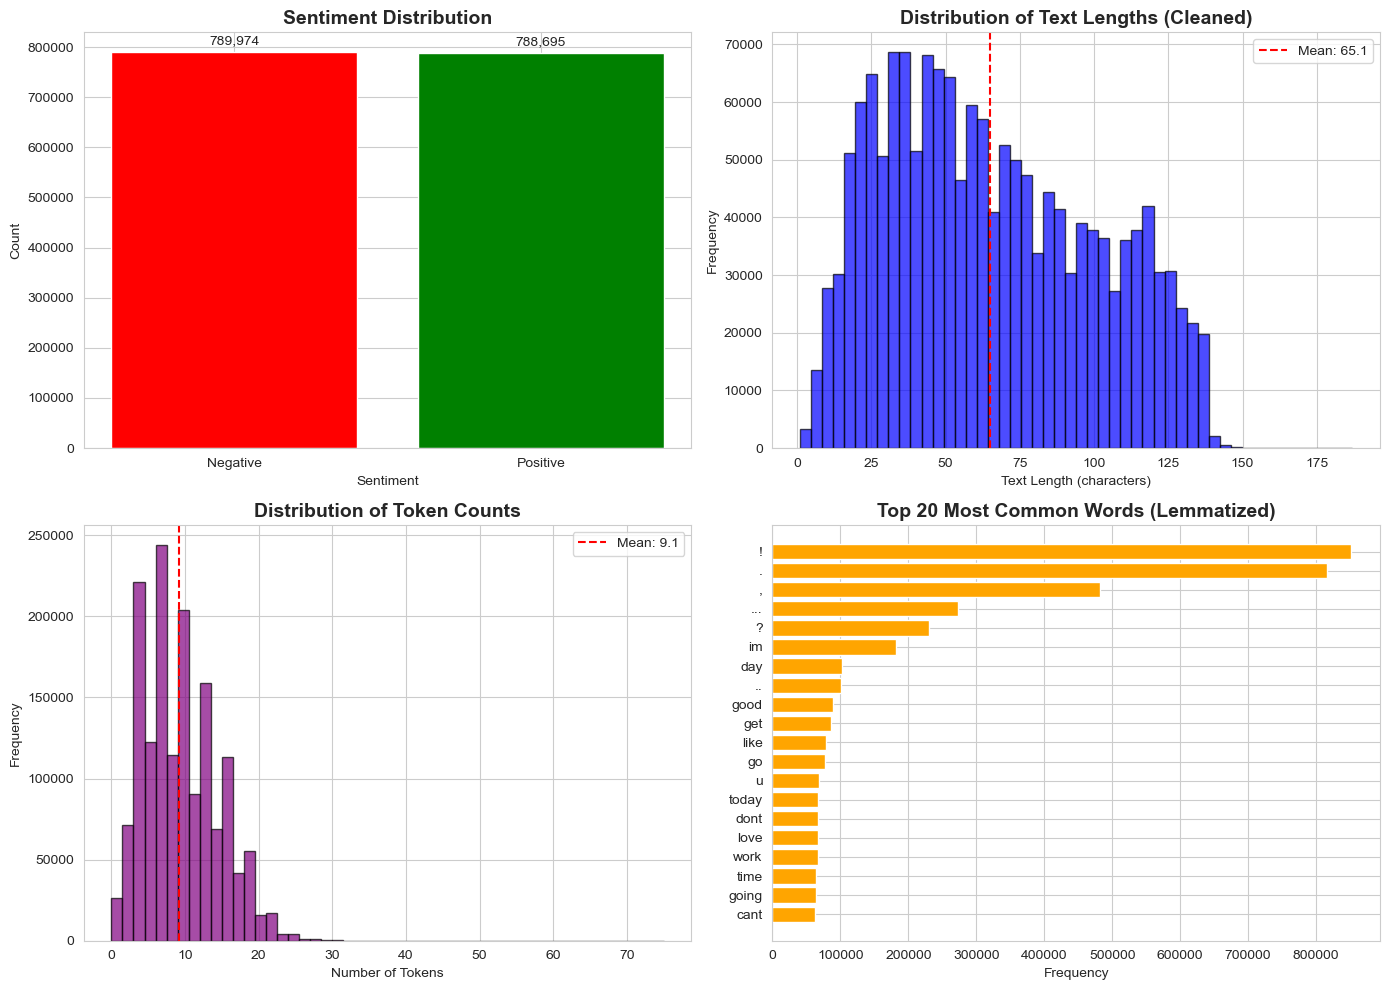


Top 20 most common words:
  !: 851,528
  .: 815,857
  ,: 482,035
  ...: 272,836
  ?: 231,099
  im: 181,448
  day: 102,156
  ..: 100,819
  good: 89,427
  get: 85,597
  like: 79,242
  go: 77,388
  u: 68,200
  today: 67,792
  dont: 67,419
  love: 67,175
  work: 66,670
  time: 64,551
  going: 63,938
  cant: 63,263


In [17]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sentiment Distribution
sentiment_counts = df_cleaned['sentiment'].value_counts()
axes[0, 0].bar(['Negative', 'Positive'], sentiment_counts.values, color=['red', 'green'])
axes[0, 0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Sentiment')
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + 10000, f'{v:,}', ha='center', va='bottom')

# 2. Text Length Distribution
axes[0, 1].hist(text_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Text Lengths (Cleaned)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(text_lengths.mean(), color='red', linestyle='--', label=f'Mean: {text_lengths.mean():.1f}')
axes[0, 1].legend()

# 3. Token Count Distribution
axes[1, 0].hist(token_counts, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Token Counts', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Tokens')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(token_counts.mean(), color='red', linestyle='--', label=f'Mean: {token_counts.mean():.1f}')
axes[1, 0].legend()

# 4. Top 20 Most Common Words
all_tokens = [token for tokens in df_cleaned['tokens_lemmatized'] for token in tokens]
token_freq = Counter(all_tokens)
top_20 = dict(token_freq.most_common(20))
axes[1, 1].barh(list(top_20.keys()), list(top_20.values()), color='orange')
axes[1, 1].set_title('Top 20 Most Common Words (Lemmatized)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\nTop 20 most common words:")
for word, count in token_freq.most_common(20):
    print(f"  {word}: {count:,}")

## 8. Data Splits (Train/Validation/Test)

**What we're doing:** Dividing the dataset into 3 separate parts for machine learning.

**Split ratios:**
- **Training set: 70%** - Used to train the model
- **Validation set: 15%** - Used to tune the model and prevent overfitting
- **Test set: 15%** - Used to evaluate final model performance

**Note:** `random_state=42` ensures reproducibility (same split every time).

**Stratification:**
- We use stratified splitting to keep the same proportion of positive/negative tweets in each split.

**Why split?**
- Prevents overfitting and gives a fair evaluation on unseen data.

**Example:**
- If original data is 50% positive and 50% negative, each split keeps ~50/50.

In [18]:
# Prepare the data for splitting
# We'll keep only the essential columns
df_final = df_cleaned[['text', 'text_cleaned', 'text_processed', 'sentiment', 'tokens_lemmatized']].copy()

print("Original dataset shape:", df_final.shape)
print("\nSentiment distribution:")
print(df_final['sentiment'].value_counts(normalize=True))

# First split: 70% train, 30% temp (which will be split into validation and test)
X = df_final.drop('sentiment', axis=1)
y = df_final['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y
)

# Second split: Split temp into 50% validation and 50% test (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50, 
    random_state=42, 
    stratify=y_temp
)

# Combine features and labels
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Build a single summary table for sizes + sentiment distribution
def _split_summary(name, df, total_rows):
    counts = df['sentiment'].value_counts().sort_index()
    neg = counts.get(0, 0)
    pos = counts.get(1, 0)
    return {
        "Split": name,
        "Samples": len(df),
        "Percent": len(df) / total_rows * 100,
        "Negative (0)": neg,
        "Negative %": neg / len(df) * 100 if len(df) else 0,
        "Positive (1)": pos,
        "Positive %": pos / len(df) * 100 if len(df) else 0,
    }

summary_df = pd.DataFrame([
    _split_summary("Train", train_df, len(df_final)),
    _split_summary("Validation", val_df, len(df_final)),
    _split_summary("Test", test_df, len(df_final)),
])

summary_df["Percent"] = summary_df["Percent"].map(lambda x: f"{x:.1f}%")
summary_df["Negative %"] = summary_df["Negative %"].map(lambda x: f"{x:.2f}%")
summary_df["Positive %"] = summary_df["Positive %"].map(lambda x: f"{x:.2f}%")

print("\n" + "="*80)
print("DATA SPLIT SUMMARY + SENTIMENT DISTRIBUTION")
print("="*80)
summary_df

Original dataset shape: (1578669, 5)

Sentiment distribution:
sentiment
1    0.500405
0    0.499595
Name: proportion, dtype: float64

DATA SPLIT SUMMARY + SENTIMENT DISTRIBUTION


,Split,Samples,Percent,Negative (0),Negative %,Positive (1),Positive %
0,Train,1105068,70.0%,552086,49.96%,552982,50.04%
1,Validation,236800,15.0%,118304,49.96%,118496,50.04%
2,Test,236801,15.0%,118305,49.96%,118496,50.04%


## 9. Save Processed Data

**What we're doing:** Saving all our cleaned and processed data to CSV files.

**Why save?**
- Saves time (don't need to rerun cleaning every time)
- Can share data with others
- Can use the processed data for model training without reprocessing

**Important:** The original `Sentiment140.csv` file is **NOT** modified. These are NEW files.

**Files created:**
1. **sentiment140_train.csv** - Training data (70%)
2. **sentiment140_val.csv** - Validation data (15%)
3. **sentiment140_test.csv** - Test data (15%)
4. **sentiment140_processed.csv** - Complete processed dataset

**What's included in each file:**
- `text`: Original tweet text
- `text_cleaned`: Cleaned tweet (URLs, mentions, etc. removed)
- `text_processed`: Final processed text (lemmatized, stopwords removed)
- `tokens_lemmatized`: List of processed word tokens
- `sentiment`: Binary label (0=negative, 1=positive)

In [19]:
# Save the processed datasets
train_df.to_csv('sentiment140_train.csv', index=False)
val_df.to_csv('sentiment140_val.csv', index=False)
test_df.to_csv('sentiment140_test.csv', index=False)

# Also save the complete processed dataset
df_final.to_csv('sentiment140_processed.csv', index=False)

print("✅ Data saved successfully!")
print(f"\nFiles created:")
print(f"  - sentiment140_train.csv ({len(train_df):,} rows)")
print(f"  - sentiment140_val.csv ({len(val_df):,} rows)")
print(f"  - sentiment140_test.csv ({len(test_df):,} rows)")
print(f"  - sentiment140_processed.csv ({len(df_final):,} rows)")

✅ Data saved successfully!

Files created:
  - sentiment140_train.csv (1,105,068 rows)
  - sentiment140_val.csv (236,800 rows)
  - sentiment140_test.csv (236,801 rows)
  - sentiment140_processed.csv (1,578,669 rows)
